# [Caregivers Project] Preliminary Models

In this notebook we will try out:

- Logistic Regression
- Random Forest Classifier

on the data containing labels from the latest (2020-06-03) regex search results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cleaning.text_preprocessing import preprocess_text

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer,\
                                            TfidfVectorizer,\
                                            TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,\
                            classification_report,\
                            confusion_matrix,\
                            plot_confusion_matrix
from sklearn.model_selection import train_test_split,\
                                    GridSearchCV
from sklearn.pipeline import Pipeline

from time import time

## Regex Results File

In [2]:
df = pd.read_csv('../data/interim/2020-06-03-em-investigational_regex_results.csv')

#### Total Number of Observations

In [3]:
len(df)

108467

#### Number of Unique Values in Each Column

In [4]:
df[['TEXT', 'CHILD', 'SPOUSE']].nunique()

TEXT      108467
CHILD          2
SPOUSE         2
dtype: int64

#### Number of NA Values in Each Column

In [5]:
df[['TEXT', 'CHILD', 'SPOUSE']].isna().sum()

TEXT      0
CHILD     0
SPOUSE    0
dtype: int64

#### Value Counts

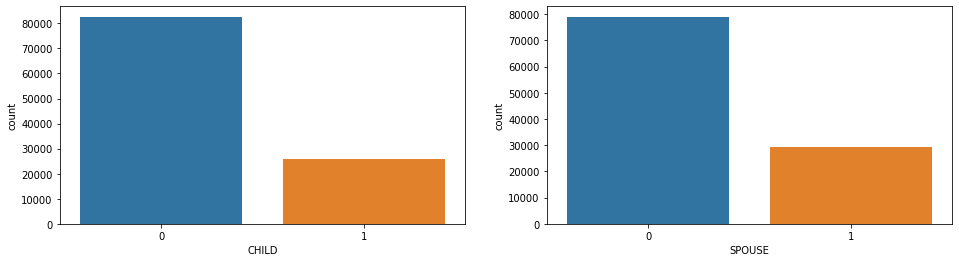

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

sns.countplot(x='CHILD', data=df, ax=ax[0])
sns.countplot(x='SPOUSE', data=df, ax=ax[1])

## Logistic Regression Model

Take first few notes as a "dummy" corpus to play around with just to see what the classes and methods do.

In [7]:
dummy_corpus = df['TEXT'].iloc[0:3]

In [8]:
def vectorizer_fit_and_print(vectorizer, corpus, list_step=10):
    matrix = vectorizer.fit_transform(corpus)
    df = pd.DataFrame(matrix.todense().tolist(),
                      columns=vectorizer.get_feature_names()).T
    
    print('{} Features (every {}):\n\n{}\n'.format(vectorizer.__class__.__name__,
                                                   list_step,
                                                   vectorizer.get_feature_names()[::list_step]))
    
    print('{} Values:\n\n{}\n'.format(vectorizer.__class__.__name__,
                                      df))
    
    return vectorizer

### CountVectorizer

#### Basic Usage

In [9]:
vectorizer_fit_and_print(CountVectorizer(),
                        dummy_corpus)

CountVectorizer Features (every 10):

['00', '09', '130s', '153', '198', '24', '32', '42', '521', '6871', '83', '98', 'action', 'and', 'around', 'awaiting', 'bleeing', 'by', 'central', 'closely', 'conjunctiva', 'ctab', 'disease', 'drainage', 'ears', 'ext', 'fh', 'for', 'glycemic', 'hd', 'hold', 'hyperlipidemia', 'incisons', 'is', 'labs', 'lines', 'malignant', 'mg', 'month', 'neoplasm', 'nose', 'obtain', 'output', 'perrl', 'pmi', 'procedure', 'q4hour', 'related', 'restart', 'ros', 'serial', 'since', 'st', 'support', 'tenderness', 'tmax', 'trending', 'up', 'vital', 'while']

CountVectorizer Values:

           0  1  2
00         2  1  2
01         0  1  1
02         0  1  0
03         0  1  1
04         0  0  1
...       .. .. ..
wnl        0  0  1
wound      0  1  0
year       0  0  1
yesterday  0  2  0
yo         0  0  1

[599 rows x 3 columns]



CountVectorizer()

#### Add Preprocessor, Remove Stop Words

In [10]:
vectorizer_fit_and_print(CountVectorizer(preprocessor=preprocess_text),
                        dummy_corpus)

CountVectorizer Features (every 10):

['abd', 'admission', 'anemia', 'around', 'awaiting', 'bleeding', 'but', 'cc', 'ckmb', 'complaint', 'crf', 'dialysis', 'downward', 'dt', 'examined', 'fenofibrate', 'follows', 'general', 'hcp', 'her', 'hpi', 'improves', 'instability', 'kul', 'likely', 'lytes', 'meql', 'mmoll', 'nephrectomy', 'note', 'old', 'patient', 'plan', 'prbcs', 'pulses', 'recommendations', 'responds', 'right', 'serial', 'since', 'sr', 'stopped', 'tenderness', 'tmax', 'trending', 'urology', 'vs', 'will']

CountVectorizer Values:

           0  1  2
abd        0  1  1
abdominal  0  0  1
abg        0  1  1
above      0  0  2
absent     0  0  2
...       .. .. ..
wnl        0  0  1
wound      0  1  0
year       0  0  1
yesterday  0  2  0
yo         1  1  1

[477 rows x 3 columns]



CountVectorizer(preprocessor=<function preprocess_text at 0x7f0dc4dc6430>)

### TfidfVectorizer

#### Basic Usage

In [11]:
vectorizer_fit_and_print(TfidfVectorizer(), dummy_corpus)

TfidfVectorizer Features (every 10):

['00', '09', '130s', '153', '198', '24', '32', '42', '521', '6871', '83', '98', 'action', 'and', 'around', 'awaiting', 'bleeing', 'by', 'central', 'closely', 'conjunctiva', 'ctab', 'disease', 'drainage', 'ears', 'ext', 'fh', 'for', 'glycemic', 'hd', 'hold', 'hyperlipidemia', 'incisons', 'is', 'labs', 'lines', 'malignant', 'mg', 'month', 'neoplasm', 'nose', 'obtain', 'output', 'perrl', 'pmi', 'procedure', 'q4hour', 'related', 'restart', 'ros', 'serial', 'since', 'st', 'support', 'tenderness', 'tmax', 'trending', 'up', 'vital', 'while']

TfidfVectorizer Values:

                  0         1         2
00         0.089143  0.017625  0.032687
01         0.000000  0.022695  0.021045
02         0.000000  0.029841  0.000000
03         0.000000  0.022695  0.021045
04         0.000000  0.000000  0.027672
...             ...       ...       ...
wnl        0.000000  0.000000  0.027672
wound      0.000000  0.029841  0.000000
year       0.000000  0.000000  0.02

TfidfVectorizer()

#### Add Preprocessor, Remove Stop Words

In [12]:
vectorizer_fit_and_print(TfidfVectorizer(preprocessor=preprocess_text), dummy_corpus)

TfidfVectorizer Features (every 10):

['abd', 'admission', 'anemia', 'around', 'awaiting', 'bleeding', 'but', 'cc', 'ckmb', 'complaint', 'crf', 'dialysis', 'downward', 'dt', 'examined', 'fenofibrate', 'follows', 'general', 'hcp', 'her', 'hpi', 'improves', 'instability', 'kul', 'likely', 'lytes', 'meql', 'mmoll', 'nephrectomy', 'note', 'old', 'patient', 'plan', 'prbcs', 'pulses', 'recommendations', 'responds', 'right', 'serial', 'since', 'sr', 'stopped', 'tenderness', 'tmax', 'trending', 'urology', 'vs', 'will']

TfidfVectorizer Values:

                  0         1         2
abd        0.000000  0.027228  0.026838
abdominal  0.000000  0.000000  0.035288
abg        0.000000  0.027228  0.026838
above      0.000000  0.000000  0.070577
absent     0.000000  0.000000  0.070577
...             ...       ...       ...
wnl        0.000000  0.000000  0.035288
wound      0.000000  0.035802  0.000000
year       0.000000  0.000000  0.035288
yesterday  0.000000  0.071604  0.000000
yo         0.0453

TfidfVectorizer(preprocessor=<function preprocess_text at 0x7f0dc4dc6430>)

### Logistic Regression (and Random Forest, just for fun)

In [13]:
test_size = 0.2
random_state = 10

x_train, x_valid, y_train, y_valid = train_test_split(df['TEXT'],
                                                      df['CHILD'],
                                                      test_size=test_size,
                                                      random_state=random_state)

# Logistic Regression
pipe_LR = Pipeline([('vect', CountVectorizer(preprocessor=preprocess_text,
                                             stop_words='english')),
                    ('tfidf', TfidfTransformer()),
                    ('model', LogisticRegression(class_weight='balanced',
                                                 max_iter=200,
                                                 verbose=1,
                                                 n_jobs=-1))])

# Random Forest
pipe_RF = Pipeline([('vect', CountVectorizer(preprocessor=preprocess_text,
                                             stop_words='english')),
                   ('tfidf', TfidfTransformer()),
                   ('model', RandomForestClassifier(class_weight='balanced',
                                                   verbose=1,
                                                   n_jobs=-1))])

model_LR = pipe_LR.fit(x_train, y_train)
model_RF = pipe_RF.fit(x_train, y_train)

y_pred_LR = model_LR.predict(x_valid)
y_pred_RF = model_RF.predict(x_valid)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


In [14]:
def print_results(pipe, x_valid, y_valid, y_pred, header=''):
    print(header)
    print('Accuracy (validation): {}%\n'.format(round(accuracy_score(y_valid, y_pred)*100, 2)))
    print(classification_report(y_valid, y_pred))
    print('Confusion Matrix:\n{}'.format(confusion_matrix(y_valid, y_pred)))

    return plot_confusion_matrix(pipe, x_valid, y_valid, normalize='true')

#### Logistic Regression


Accuracy (validation): 96.13%

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     16399
           1       0.89      0.97      0.92      5295

    accuracy                           0.96     21694
   macro avg       0.94      0.96      0.95     21694
weighted avg       0.96      0.96      0.96     21694

Confusion Matrix:
[[15736   663]
 [  176  5119]]


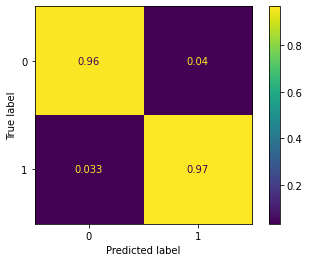

In [15]:
print_results(pipe_LR, x_valid, y_valid, y_pred_LR)

#### Random Forest


Accuracy (validation): 94.1%

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16399
           1       0.98      0.77      0.86      5295

    accuracy                           0.94     21694
   macro avg       0.96      0.88      0.91     21694
weighted avg       0.94      0.94      0.94     21694

Confusion Matrix:
[[16333    66]
 [ 1213  4082]]


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


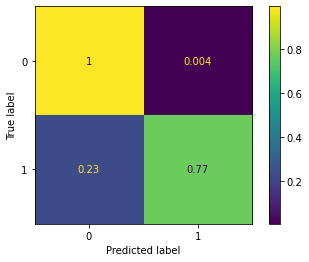

In [16]:
print_results(pipe_RF, x_valid, y_valid, y_pred_RF)

## Other Notes?

Let's see what the model predicts on notes outside the original set (just for fun).

The [`NOTEEVENTS` table](https://mimic.physionet.org/mimictables/noteevents/) (~1 GB) from MIMIC:

In [17]:
df_NE = pd.read_csv('../data/raw/mimic-iii/NOTEEVENTS.csv')

/home/anne/Desktop/caregivers/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
df_NE_unseen = df_NE[~df_NE['ROW_ID'].isin(df['ROW_ID'].values)]
df_unseen = df_NE_unseen.sample(n=1000, random_state=1)

In [19]:
model = model_LR  # Change to model_RF if desired

pred_unseen = model.predict(df_unseen['TEXT'])
pred_unseen = pd.Series(pred_unseen).astype(bool)

df_unseen_positive = df_unseen.reset_index(drop=True)[pred_unseen]


print(df_unseen_positive['TEXT'].iloc[0])

[**2141-2-8**] 8:45 PM
 TRAUMA SERIES (LAT C-SPINE, AP CXR, AP PELVIS PORT) PORT        Clip # [**Clip Number (Radiology) 38650**]
 Reason: S/P MVA
 ______________________________________________________________________________
 [**Hospital 4**] MEDICAL CONDITION:
  73 year old man with traumatic injury
 REASON FOR THIS EXAMINATION:
  r/o traumatic injury
 ______________________________________________________________________________
                                 FINAL REPORT
 HISTORY:  Major trauma.  Trauma series.

 Cross table lateral film cervical spine images only to level of the C6-7 disc.
 Normal vertebral body alignment and discs with no fractures identified. It is
 difficult to assess the prevertebral soft tissues which are probably normal.

 AP supine film of the chest done on trauma board does not image the left
 lateral hemithorax and lung.  No cardiomegaly, vascular congestion,
 consolidations, or mediastinal widening identified.  The right CP angle is
 sharp.  There is

In [21]:
# what proportion of the notes predicted positive don't have any of 'son', 'daughter', or 'child' in them?
df_no_son_daughter_child = df_unseen_positive[~(df_unseen_positive['TEXT'].str.lower().str.contains('son') | 
                                                df_unseen_positive['TEXT'].str.lower().str.contains('daughter') | 
                                                df_unseen_positive['TEXT'].str.lower().str.contains('child'))]

print(len(df_no_son_daughter_child))
print(len(df_unseen_positive))

20
251
